In [297]:
import tensorflow as tf

In [307]:
from tensorflow.keras.layers import Flatten, Embedding, Dense, SimpleRNN, LSTM,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import numpy as np

In [299]:
from tensorflow.keras.datasets import imdb

## Load dataset

In [300]:
start_char = 1
oov_char = 2
index_from = 3
vocab_size = 20000
max_len = 50

In [301]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [302]:
word_index = imdb.get_word_index()

In [303]:
len(word_index)

88584

In [304]:

index_word = {value+index_from:key for key,value in word_index.items()}
index_word[start_char] = "[START]"
index_word[oov_char] = "[OOV]"

In [305]:
" ".join([index_word.get(i) for i in x_test[0]])

"[START] please give this one a miss br br kristy swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite lacklustre so all you madison fans give this a miss"

In [286]:
padded_x_train = pad_sequences(x_train, maxlen=max_len)
padded_x_test = pad_sequences(x_test, maxlen=max_len)

In [287]:
model = Sequential([
    Embedding(vocab_size, 128 , input_length= max_len),
    Flatten(),
    Dense(1, activation= 'sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])

In [288]:
history = model.fit(padded_x_train, y_train, steps_per_epoch=150, epochs=10 ,validation_data=(padded_x_test, y_test))



Epoch 1/10


150/150 [==============================] - 1s 9ms/step - loss: 0.5992 - accuracy: 0.6954 - val_loss: 0.4446 - val_accuracy: 0.8020
Epoch 2/10
150/150 [==============================] - 1s 8ms/step - loss: 0.3342 - accuracy: 0.8648 - val_loss: 0.3851 - val_accuracy: 0.8265
Epoch 3/10
150/150 [==============================] - 1s 8ms/step - loss: 0.1998 - accuracy: 0.9381 - val_loss: 0.3925 - val_accuracy: 0.8249
Epoch 4/10
150/150 [==============================] - 1s 8ms/step - loss: 0.1038 - accuracy: 0.9813 - val_loss: 0.4127 - val_accuracy: 0.8184
Epoch 5/10
150/150 [==============================] - 1s 8ms/step - loss: 0.0493 - accuracy: 0.9962 - val_loss: 0.4368 - val_accuracy: 0.8168
Epoch 6/10
150/150 [==============================] - 1s 8ms/step - loss: 0.0252 - accuracy: 0.9995 - val_loss: 0.4581 - val_accuracy: 0.8159
Epoch 7/10
150/150 [==============================] - 1s 8ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.4782 - val_accuracy: 0.8145
Epoch 8/10
150/15

In [276]:
history.history.keys()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

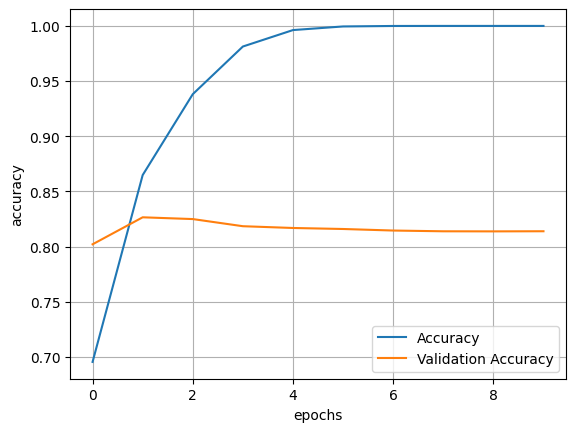

In [289]:
acc  = history.history['accuracy']
val_acc  = history.history['val_accuracy']
plt.plot(range(len(acc)), acc  )
plt.plot(range(len(val_acc)), val_acc )
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.grid()



In [294]:
model_rnn = Sequential([
    Embedding(vocab_size, 128 , input_length= max_len ),
    SimpleRNN( 128, activation='tanh'),
    Dense(1, activation= 'sigmoid')
])
model_rnn.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])

In [295]:
history_rnn = model_rnn.fit(padded_x_train, y_train, steps_per_epoch=150, epochs=10 , validation_data=(padded_x_test, y_test))

Epoch 1/10


150/150 [==============================] - 7s 43ms/step - loss: 0.5067 - accuracy: 0.7462 - val_loss: 0.4134 - val_accuracy: 0.8127
Epoch 2/10
150/150 [==============================] - 6s 43ms/step - loss: 0.2888 - accuracy: 0.8799 - val_loss: 0.4425 - val_accuracy: 0.7978
Epoch 3/10
150/150 [==============================] - 7s 45ms/step - loss: 0.1187 - accuracy: 0.9584 - val_loss: 0.5719 - val_accuracy: 0.7908
Epoch 4/10
150/150 [==============================] - 6s 43ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.7775 - val_accuracy: 0.7900
Epoch 5/10
150/150 [==============================] - 6s 43ms/step - loss: 0.0141 - accuracy: 0.9964 - val_loss: 0.8364 - val_accuracy: 0.7885
Epoch 6/10
150/150 [==============================] - 6s 43ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.9520 - val_accuracy: 0.7827
Epoch 7/10
150/150 [==============================] - 6s 43ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.0239 - val_accuracy: 0.7852
Epoch 8/10

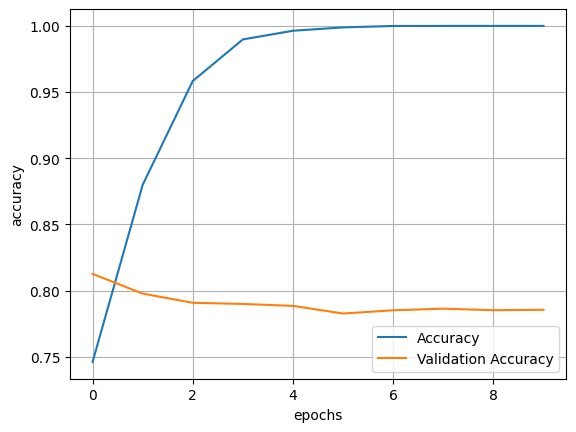

In [296]:
acc  = history_rnn.history['accuracy']
val_acc  = history_rnn.history['val_accuracy']
plt.plot(range(len(acc)), acc  )
plt.plot(range(len(val_acc)), val_acc )
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.grid()

In [310]:
model_lstm = Sequential([
    Embedding(vocab_size, 128, input_length= max_len),
    LSTM(150, return_sequences=True),
    Dropout(0.2),
    LSTM(100),
    Dense(1, activation='sigmoid')
    
])
model_lstm.compile(optimizer="adam", loss="binary_crossentropy", metrics= ['acc'])

In [311]:
history = model_lstm.fit(padded_x_train,y_train, epochs=10, batch_size=32 , validation_data=(padded_x_test, y_test))

Epoch 1/10


782/782 [==============================] - 81s 102ms/step - loss: 0.4592 - acc: 0.7810 - val_loss: 0.4059 - val_acc: 0.8138
Epoch 2/10
782/782 [==============================] - 79s 101ms/step - loss: 0.2876 - acc: 0.8795 - val_loss: 0.4190 - val_acc: 0.8096
Epoch 3/10
782/782 [==============================] - 80s 102ms/step - loss: 0.1823 - acc: 0.9288 - val_loss: 0.5040 - val_acc: 0.7986
Epoch 4/10
782/782 [==============================] - 79s 102ms/step - loss: 0.1105 - acc: 0.9586 - val_loss: 0.6812 - val_acc: 0.7929
Epoch 5/10
782/782 [==============================] - 79s 101ms/step - loss: 0.0615 - acc: 0.9785 - val_loss: 0.8671 - val_acc: 0.7882
Epoch 6/10
782/782 [==============================] - 77s 98ms/step - loss: 0.0451 - acc: 0.9852 - val_loss: 0.8659 - val_acc: 0.7929
Epoch 7/10
782/782 [==============================] - 78s 100ms/step - loss: 0.0316 - acc: 0.9897 - val_loss: 1.0575 - val_acc: 0.7899
Epoch 8/10
782/782 [==============================] - 78s 99ms/step

## Save models

In [312]:
model.save('app/model/simple_ann_imdb.h5')
model_rnn.save('app/model/simple_rnn_imdb.h5')
model_lstm.save('app/model/simple_lstm_imdb.h5')

/Users/tanweersalah/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
